In [1]:
# Download the data csv file from https://drive.google.com/file/d/1QLvpwOV9VJL98BBSYSe1TYUuIxw7i9kH
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html
# (we will use a reduced version of the dataset)

# Upload the file using colab upload functions
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

## **SPLIT NORMALIZED DATA**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from the file
data = pd.read_csv('YearPredictionMSD.csv')
X = data.to_numpy()[:,1:]
Y = data.to_numpy()[:,0]

print('Data size: ', X.shape)
print('Output size: ', Y.shape)

# data normalizations (scaling down all values to the interval [0,1])
# The years 1922-2011 are scaled down to integers [0,1,2,..., 89]
a = X.min()
b = X.max()
X = (X - a) / (b - a)  # all values now between 0 and 1 !
Y = Y - Y.min()        # The years 1922-2011 are mapped to 0-89

# Validation data set
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=5)

# Test data set
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=5)

print('Training Data size: ', X_train.shape)
print('Training Output size: ', Y_train.shape)
print('Validation Data size: ', X_val.shape)
print('Validation Output size: ', Y_val.shape)
print('Test Data size: ', X_test.shape)
print('Test Output size: ', Y_test.shape)

Data size:  (50000, 90)
Output size:  (50000,)
Training Data size:  (40500, 90)
Training Output size:  (40500,)
Validation Data size:  (5000, 90)
Validation Output size:  (5000,)
Test Data size:  (4500, 90)
Test Output size:  (4500,)


# **RELATION VIEW**

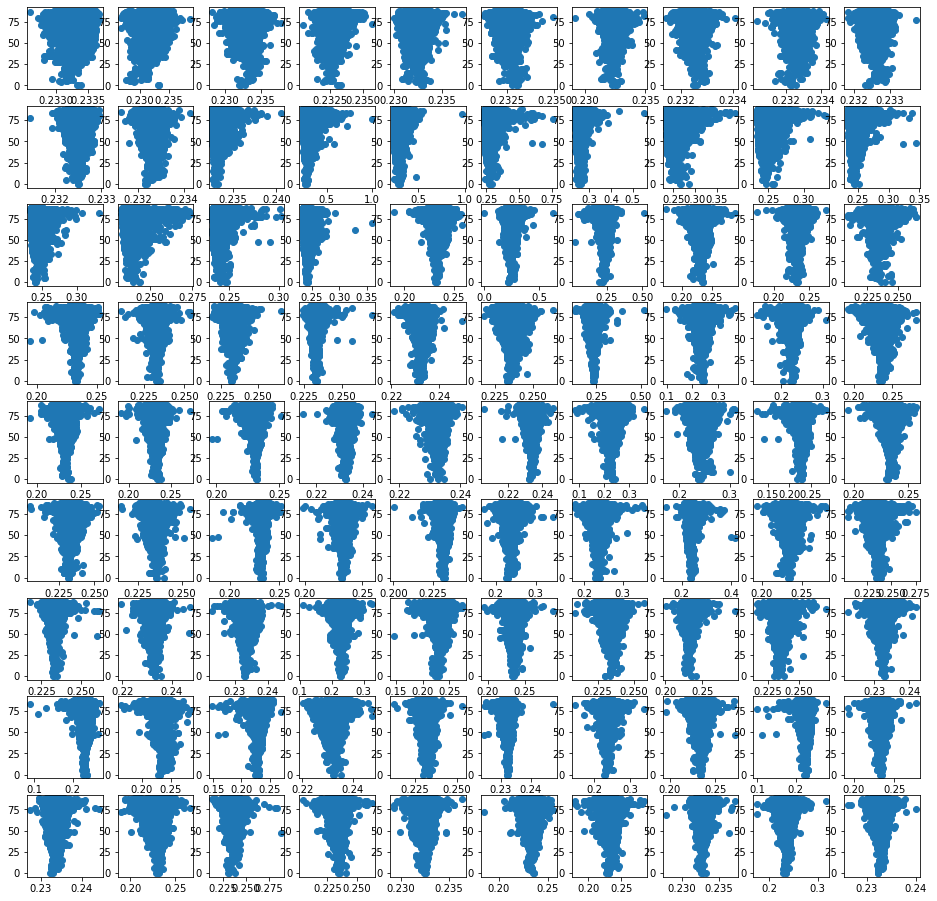

In [3]:
# inspect the data: visualize relations between each dimension of the feature vector and the output
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
for i in range(90):
  plt.subplot(9, 10, i+1)
  plt.scatter(X_train[:,i],Y_train)

# **CORRELATION**

In [4]:
import numpy as np

# inspect the data: compute correlation coefficient between each dimension of the feature vector and the output
for i in range(90):
  corr, _ = np.corrcoef(X_train[:,i],Y_train)
  print(corr)

[1.         0.21206402]
[1.         0.03746939]
[ 1.         -0.13219719]
[1.00000000e+00 7.39480697e-04]
[1.         0.02340623]
[ 1.         -0.17525826]
[1.         0.10198479]
[ 1.         -0.03927365]
[ 1.         -0.02346983]
[1.         0.03709142]
[1.         0.02384356]
[ 1.        -0.0751283]
[1.         0.03196677]
[1.         0.08452676]
[ 1.00000000e+00 -9.08337077e-04]
[1.         0.03867509]
[1.        0.0423675]
[1.         0.02858877]
[1.         0.01124755]
[1.         0.09073675]
[ 1.         -0.04936294]
[1.         0.05456481]
[1.         0.04515813]
[ 1.        -0.0538918]
[1.         0.06411642]
[ 1.         -0.01203126]
[ 1.         -0.00446374]
[ 1.         -0.00140894]
[1.         0.05384693]
[1.         0.01159442]
[ 1.         -0.06249708]
[1.        0.0268341]
[ 1.         -0.08330583]
[1.         0.03814691]
[ 1.         -0.03692268]
[ 1.         -0.09573767]
[ 1.         -0.03668992]
[1.         0.06663172]
[1.         0.07353046]
[ 1.         -0.12337288

# **MODELS CHECK**

### LINEAR REGRESSION

In [5]:
# Linear regression

# gettig less data to check all models
X_70, X_30, Y_70, Y_30 = train_test_split(X_train, Y_train, test_size = 0.3, random_state=5)
X_v_70, X_v_30, Y_v_70, Y_v_30 = train_test_split(X_val, Y_val, test_size = 0.3, random_state=5)
X_t_70, X_t_30, Y_t_70, Y_t_30 = train_test_split(X_test, Y_test, test_size = 0.3, random_state=5)

X_85, X_15, Y_85, Y_15 = train_test_split(X_train, Y_train, test_size = 0.15, random_state=5)
X_v_85, X_v_15, Y_v_85, Y_v_15 = train_test_split(X_val, Y_val, test_size = 0.15, random_state=5)
X_t_85, X_t_15, Y_t_85, Y_t_15 = train_test_split(X_test, Y_test, test_size = 0.15, random_state=5)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score # more metrics available at
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
#X_test = scaler.transform(X_test)

# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = lr.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))
ev_val = explained_variance_score(Y_val, y_val_predicted)
print('Explained variance (validation set) linear model: {}'.format(ev_val))
# Print the model coefficients
print('Model coefficients: ', lr.coef_)

MSE (validation set) linear model: 87.31132035778866
R2 (validation set) linear model: 0.21431183464504322
Explained variance (validation set) linear model: 0.21440421369388285
Model coefficients:  [ 4.03464442e+04 -2.41230213e+03 -1.35117306e+03 -9.68905736e+02
 -5.09339779e+02 -1.02307993e+04 -7.11669527e+01 -5.53383168e+03
 -2.61239549e+03  1.38777124e+03 -7.74286411e+03  4.31128195e+02
  2.14457955e+03  1.89477761e+01 -1.84124794e+01  3.17273704e+01
  1.74951099e+01  1.17028778e+02  1.00168291e+02  1.22991818e+02
 -4.22195134e+01 -2.87018593e+01  3.72582673e+02  6.55395403e+01
 -1.80375574e+02  4.38883049e+00  7.12711787e+01 -6.14182165e+00
 -3.13235982e+01 -3.42101685e+01 -5.28590111e+01 -6.62620014e+01
 -9.27228985e+01  2.58020090e+02  2.19164513e+02 -2.34215832e+02
 -1.82087032e+01  3.64181330e+01  7.81072394e+01 -1.03408215e+02
 -1.92098436e+02 -6.88687504e+01 -1.19451242e+02 -2.77076521e+00
 -9.40158583e+01  2.88198145e+02  2.38103930e+01 -5.86708066e+01
  4.15654732e+01  8.42

## LASSO

In [6]:
# Fit a Lasso model

lss_lambda=0.0005
lss = linear_model.Lasso(lss_lambda)
lss.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = lss.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) Lasso model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) Lasso model: {}'.format(r2_val))
# Print the model coefficients, just to see the sparsity
print('Model coefficients: ', lss.coef_)

MSE (validation set) Lasso model: 101.86949253175922
R2 (validation set) Lasso model: 0.08330724624325803
Model coefficients:  [   0.            0.         -231.61220117   -0.            0.
   -0.            0.           -0.           -0.            0.
   -0.           -0.            0.           17.40664474  -36.48732446
   37.85544227   17.13449815  -12.9171621     6.25160248  192.98942966
  -97.22977332   -0.            0.          -36.63806492  137.51338453
   -6.72793335   68.21813583   -6.42469537   -0.           -0.
  -49.52623848   -0.           -0.            0.           -0.
  -99.78750456  -40.57687527   46.68245772   79.47531766 -166.80558925
 -249.56325127   -0.           -0.           -0.           -0.
   -0.           31.88137898  -44.49300669    0.           -0.
   -0.           -0.            0.           -0.            0.
    0.          -70.68991367   63.65398036 -181.63763081 -186.48952485
   -0.           -0.         -235.93537303    0.           -0.
   -0.        

## POLINOMIAL

In [7]:
# Fit a Polinomial model

from sklearn.preprocessing import PolynomialFeatures

# Transform feature vectors
max_degree = 2
poly = PolynomialFeatures(max_degree)
X_train_poly = poly.fit_transform(X_70)
X_val_poly = poly.fit_transform(X_v_70)
X_test_poly = poly.fit_transform(X_t_70)
# Fit a poynomial regression model
lrpol = linear_model.LinearRegression()
lrpol.fit(X_train_poly, Y_70)
# Predict output for the validation data
y_val_predicted = lrpol.predict(X_val_poly)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_v_70, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_v_70, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

print(lrpol.coef_)

MSE (validation set) linear model: 150.71678754433992
R2 (validation set) linear model: -0.3764320256457825
[-4.29479132e-03 -6.71578331e+07  1.89178166e+06 ... -5.20807453e+03
  2.14435060e+04  1.75044150e+05]


## RIDGE

In [8]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 104.0700285403036
R2 (validation set) linear model: 0.06350528823522616


In [9]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=0.75)
ridge.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 103.59279175739071
R2 (validation set) linear model: 0.06779979770857048


In [ ]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

In [10]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=0.25)
ridge.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 101.95642022811005
R2 (validation set) linear model: 0.08252501019431802


In [11]:
# Fit a ridge model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
# Predict output for the validation data
y_val_predicted = ridge.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 100.79323085045863
R2 (validation set) linear model: 0.09299219960735483


## HUBER

In [12]:
# Fit a Huber model
huber = linear_model.HuberRegressor(max_iter=10000)
huber.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = huber.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 98.3933349526689
R2 (validation set) linear model: 0.1145881369640519


## RANSAC

In [13]:
# Fit a RANSAC model
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = ransac.predict(X_val)
mse_val = mean_squared_error(Y_val, y_val_predicted)
# Compute metrics in the validation data
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 1470.0945352287338
R2 (validation set) linear model: -12.228936105295949


## NN

In [14]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
n_neighbors = 1
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = knn.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 161.444
R2 (validation set) linear model: -0.45278572867499167


In [15]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
n_neighbors = 10
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = knn.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 101.34692
R2 (validation set) linear model: 0.08800971840907013


In [16]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
n_neighbors = 15
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = knn.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 99.14817333333335
R2 (validation set) linear model: 0.10779557467071521


In [17]:
from sklearn.neighbors import KNeighborsRegressor
# Fit a NN model
n_neighbors = 25
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train,Y_train)
# Predict output for the validation data
y_val_predicted = knn.predict(X_val)
# Compute metrics in the validation data
mse_val = mean_squared_error(Y_val, y_val_predicted)
print('MSE (validation set) linear model: {}'.format(mse_val))
r2_val = r2_score(Y_val, y_val_predicted)
print('R2 (validation set) linear model: {}'.format(r2_val))

MSE (validation set) linear model: 98.46118944000001
R2 (validation set) linear model: 0.11397753495455498


In [ ]:
from sklearn.model_selection import cross_val_score

# Do a k-fold cross-validation using sklearn
lr = linear_model.LinearRegression()
scores = cross_val_score(lr, X, Y, cv=10, scoring='r2')
print(scores)
print("Linear Regression: %0.2f mean R2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

huber = linear_model.HuberRegressor()
huber.max_iter = 1000*huber.max_iter
scores = cross_val_score(huber, X, Y, cv=10, scoring='r2')
print(scores)
print("Huber Regression: %0.2f mean R2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.23752961 0.12883746 0.23276376 0.2014722  0.2257272  0.21610751
 0.19234935 0.21008764 0.16017371 0.19573855]
Linear Regression: 0.20 mean R2 with a standard deviation of 0.03


In [ ]:
# Finally, what is the expected r2 metric in new data?
# Fit a linear model WITH THE TRAIN AND VALIDATION DATA

X_train_and_val = pd.concat([X_train.assign(ind="train"), X_val.assign(ind="val")])
Y_train_and_val = pd.concat([Y_train.assign(ind="train"), Y_val.assign(ind="val")])

lr = linear_model.LinearRegression()
lr.fit(X_train_and_val, Y_train_and_val)
# Predict output for the TEST data
y_test_predicted = lr.predict(X_test)
# Compute metrics in the TEST data
mse_test = mean_squared_error(Y_test, y_test_predicted)
print('MSE (test set) linear model: {}'.format(mse_test))
r2_test = r2_score(Y_test, y_test_predicted)
print('R2 (test set) linear model: {}'.format(r2_test))